# Does P-part of S-wave probe change with driving frequency? 


Feb 19
I collected data using s-wave probes to see if the P-wave part of an S-wave probe is characteristic of the transducers, or if it changes with driving frequency. I compared 1 cycle and 4 cycle signals on homogeneous cement and sandstone. The probe was amplified. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from myfft import myfft
from read_my_csv import read_my_csv
exec(open('ComputeDelays.py').read())

In [2]:
import peakutils
from peakutils import indexes, peak

def gaussian(x, amplitude, mean, stddev):
    y = amplitude * np.exp(-(x - mean) ** 2 / (2 * stddev ** 2))
    return y

def FWHM(x,y):
    
    fits = peakutils.peak.gaussian_fit(x, y, center_only=False)
    x_new = np.linspace(x[0],x[-1],100)
    gaus_y = gaussian(x_new,fits[0], fits[1], fits[2])
    
    # Find the indices of the peaks
    peak_indices = indexes(gaus_y, thres=0.5, min_dist=1)

    # Get the index of the highest peak
    max_index = peak_indices[np.argmax(gaus_y[peak_indices])]

    # Calculate the FWHM
    half_max = gaus_y[max_index] / 2.0
    left_index = np.argmin(np.abs(gaus_y[:max_index] - half_max))
    right_index = np.argmin(np.abs(gaus_y[max_index:] - half_max)) + max_index
    fwhm = x_new[right_index] - x_new[left_index]
    
    # Find central frequency from peak index:
    central_freq = x_new[max_index]

    print("Peak Index:", max_index)
    print("Central Frequency:", central_freq)
    print("FWHM:", fwhm)
    print("")
    return x_new,gaus_y, max_index, central_freq, fwhm

## Homogeneous Cement

In [3]:
# P-part, 1 cycle
t_HC_P1_600,vol_HC_P1_600 = read_my_csv('TEK0036.csv')
f_HC_P1_600,FT_HC_P1_600=myfft(t_HC_P1_600,vol_HC_P1_600)
t_HC_P1_700,vol_HC_P1_700 = read_my_csv('TEK0047.csv')
f_HC_P1_700,FT_HC_P1_700=myfft(t_HC_P1_700,vol_HC_P1_700)
t_HC_P1_800,vol_HC_P1_800 = read_my_csv('TEK0037.csv')
f_HC_P1_800,FT_HC_P1_800=myfft(t_HC_P1_800,vol_HC_P1_800)
t_HC_P1_900,vol_HC_P1_900 = read_my_csv('TEK0048.csv')
f_HC_P1_900,FT_HC_P1_900=myfft(t_HC_P1_900,vol_HC_P1_900)
t_HC_P1_1000,vol_HC_P1_1000 = read_my_csv('TEK0038.csv')
f_HC_P1_1000,FT_HC_P1_1000=myfft(t_HC_P1_1000,vol_HC_P1_1000)
t_HC_P1_1100,vol_HC_P1_1100 = read_my_csv('TEK0049.csv')
f_HC_P1_1100,FT_HC_P1_1100=myfft(t_HC_P1_1100,vol_HC_P1_1100)
t_HC_P1_1200,vol_HC_P1_1200 = read_my_csv('TEK0039.csv')
f_HC_P1_1200,FT_HC_P1_1200=myfft(t_HC_P1_1200,vol_HC_P1_1200)

# P-part, 4 cycle
t_HC_P4_600,vol_HC_P4_600 = read_my_csv('TEK0040.csv')
f_HC_P4_600,FT_HC_P4_600=myfft(t_HC_P4_600,vol_HC_P4_600)
t_HC_P4_700,vol_HC_P4_700 = read_my_csv('TEK0044.csv')
f_HC_P4_700,FT_HC_P4_700=myfft(t_HC_P4_700,vol_HC_P4_700)
t_HC_P4_800,vol_HC_P4_800 = read_my_csv('TEK0041.csv')
f_HC_P4_800,FT_HC_P4_800=myfft(t_HC_P4_800,vol_HC_P4_800)
t_HC_P4_900,vol_HC_P4_900 = read_my_csv('TEK0045.csv')
f_HC_P4_900,FT_HC_P4_900=myfft(t_HC_P4_900,vol_HC_P4_900)
t_HC_P4_1000,vol_HC_P4_1000 = read_my_csv('TEK0042.csv')
f_HC_P4_1000,FT_HC_P4_1000=myfft(t_HC_P4_1000,vol_HC_P4_1000)
t_HC_P4_1100,vol_HC_P4_1100 = read_my_csv('TEK0046.csv')
f_HC_P4_1100,FT_HC_P4_1100=myfft(t_HC_P4_1100,vol_HC_P4_1100)
t_HC_P4_1200,vol_HC_P4_1200 = read_my_csv('TEK0043.csv')
f_HC_P4_1200,FT_HC_P4_1200=myfft(t_HC_P4_1200,vol_HC_P4_1200)

In [4]:
# S-part, 1 cycle
t_HC_S1_600,vol_HC_S1_600 = read_my_csv('TEK0050.csv')
f_HC_S1_600,FT_HC_S1_600=myfft(t_HC_S1_600,vol_HC_S1_600)
t_HC_S1_700,vol_HC_S1_700 = read_my_csv('TEK0051.csv')
f_HC_S1_700,FT_HC_S1_700=myfft(t_HC_S1_700,vol_HC_S1_700)
t_HC_S1_800,vol_HC_S1_800 = read_my_csv('TEK0052.csv')
f_HC_S1_800,FT_HC_S1_800=myfft(t_HC_S1_800,vol_HC_S1_800)
t_HC_S1_900,vol_HC_S1_900 = read_my_csv('TEK0053.csv')
f_HC_S1_900,FT_HC_S1_900=myfft(t_HC_S1_900,vol_HC_S1_900)
t_HC_S1_1000,vol_HC_S1_1000 = read_my_csv('TEK0054.csv')
f_HC_S1_1000,FT_HC_S1_1000=myfft(t_HC_S1_1000,vol_HC_S1_1000)
t_HC_S1_1100,vol_HC_S1_1100 = read_my_csv('TEK0055.csv')
f_HC_S1_1100,FT_HC_S1_1100=myfft(t_HC_S1_1100,vol_HC_S1_1100)
t_HC_S1_1200,vol_HC_S1_1200 = read_my_csv('TEK0056.csv')
f_HC_S1_1200,FT_HC_S1_1200=myfft(t_HC_S1_1200,vol_HC_S1_1200)

# S-part, 4 cycle
t_HC_S4_600,vol_HC_S4_600 = read_my_csv('TEK0057.csv')
f_HC_S4_600,FT_HC_S4_600=myfft(t_HC_S4_600,vol_HC_S4_600)
t_HC_S4_700,vol_HC_S4_700 = read_my_csv('TEK0058.csv')
f_HC_S4_700,FT_HC_S4_700=myfft(t_HC_S4_700,vol_HC_S4_700)
t_HC_S4_800,vol_HC_S4_800 = read_my_csv('TEK0059.csv')
f_HC_S4_800,FT_HC_S4_800=myfft(t_HC_S4_800,vol_HC_S4_800)
t_HC_S4_900,vol_HC_S4_900 = read_my_csv('TEK0060.csv')
f_HC_S4_900,FT_HC_S4_900=myfft(t_HC_S4_900,vol_HC_S4_900)
t_HC_S4_1000,vol_HC_S4_1000 = read_my_csv('TEK0061.csv')
f_HC_S4_1000,FT_HC_S4_1000=myfft(t_HC_S4_1000,vol_HC_S4_1000)
t_HC_S4_1100,vol_HC_S4_1100 = read_my_csv('TEK0062.csv')
f_HC_S4_1100,FT_HC_S4_1100=myfft(t_HC_S4_1100,vol_HC_S4_1100)
t_HC_S4_1200,vol_HC_S4_1200 = read_my_csv('TEK0063.csv')
f_HC_S4_1200,FT_HC_S4_1200=myfft(t_HC_S4_1200,vol_HC_S4_1200)

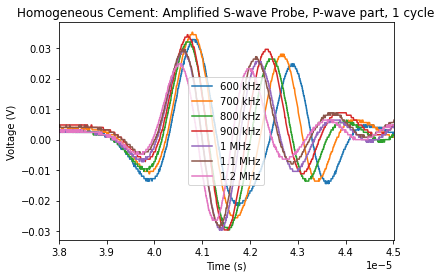

In [5]:
plt.plot(t_HC_P1_600,vol_HC_P1_600, label="600 kHz")
plt.plot(t_HC_P1_700,vol_HC_P1_700, label="700 kHz")
plt.plot(t_HC_P1_800,vol_HC_P1_800, label="800 kHz")
plt.plot(t_HC_P1_900,vol_HC_P1_900, label="900 kHz")
plt.plot(t_HC_P1_1000,vol_HC_P1_1000, label="1 MHz")
plt.plot(t_HC_P1_1100,vol_HC_P1_1100, label="1.1 MHz")
plt.plot(t_HC_P1_1200,vol_HC_P1_1200, label="1.2 MHz")

plt.title('Homogeneous Cement: Amplified S-wave Probe, P-wave part, 1 cycle')
plt.legend()
plt.xlim([3.8e-5,4.5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('HomoCem_1cyc_Strans_Ppart.jpeg',dpi=300)

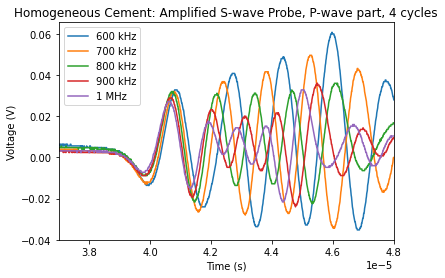

In [6]:
plt.plot(t_HC_P4_600,vol_HC_P4_600, label="600 kHz")
plt.plot(t_HC_P4_700,vol_HC_P4_700, label="700 kHz")
plt.plot(t_HC_P4_800,vol_HC_P4_800, label="800 kHz")
plt.plot(t_HC_P4_900,vol_HC_P4_900, label="900 kHz")
plt.plot(t_HC_P4_1000,vol_HC_P4_1000, label="1 MHz")
#plt.plot(t_HC_P4_1100,vol_HC_P4_1100, label="1.1 MHz")
#plt.plot(t_HC_P4_1200,vol_HC_P4_1200, label="1.2 MHz")

plt.title('Homogeneous Cement: Amplified S-wave Probe, P-wave part, 4 cycles')
plt.legend()
plt.xlim([3.7e-5,4.8e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('HomoCem_4cyc_Strans_Ppart.jpeg', dpi=300)

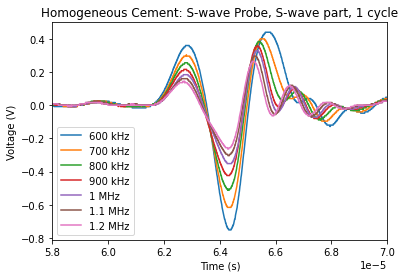

In [7]:
plt.plot(t_HC_S1_600-0.025e-5,vol_HC_S1_600, label="600 kHz")
plt.plot(t_HC_S1_700-0.017e-5,vol_HC_S1_700, label="700 kHz")
plt.plot(t_HC_S1_800-0.012e-5,vol_HC_S1_800, label="800 kHz")
plt.plot(t_HC_S1_900-0.008e-5,vol_HC_S1_900, label="900 kHz")
plt.plot(t_HC_S1_1000,vol_HC_S1_1000, label="1 MHz")
plt.plot(t_HC_S1_1100,vol_HC_S1_1100, label="1.1 MHz")
plt.plot(t_HC_S1_1200,vol_HC_S1_1200, label="1.2 MHz")

plt.title('Homogeneous Cement: S-wave Probe, S-wave part, 1 cycle')
plt.legend()
plt.xlim([5.8e-5,7e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('Figures/HomoCem_1cyc_Strans_Spart.jpeg', dpi=300)

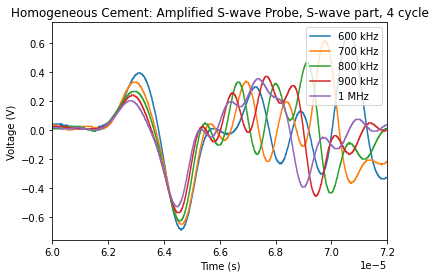

In [9]:
plt.plot(t_HC_S4_600,vol_HC_S4_600, label="600 kHz")
plt.plot(t_HC_S4_700,vol_HC_S4_700, label="700 kHz")
plt.plot(t_HC_S4_800,vol_HC_S4_800, label="800 kHz")
plt.plot(t_HC_S4_900,vol_HC_S4_900, label="900 kHz")
plt.plot(t_HC_S4_1000,vol_HC_S4_1000, label="1 MHz")
#plt.plot(t_HC_S4_1100,vol_HC_S4_1100, label="1.1 MHz")
#plt.plot(t_HC_S4_1200,vol_HC_S4_1200, label="1.2 MHz")

plt.title('Homogeneous Cement: Amplified S-wave Probe, S-wave part, 4 cycle')
plt.legend(loc=1)
plt.xlim([6e-5,7.2e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('HomoCem_4cyc_Strans_Spart.jpeg', dpi=300)

Text(0.5, 0, 'Frequency (kHz)')

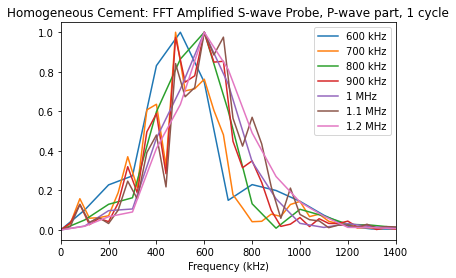

In [10]:
plt.plot(f_HC_P1_600,np.abs(FT_HC_P1_600)/max(np.abs(FT_HC_P1_600)), label="600 kHz")
plt.plot(f_HC_P1_700,np.abs(FT_HC_P1_700)/max(np.abs(FT_HC_P1_700)), label="700 kHz")
plt.plot(f_HC_P1_800,np.abs(FT_HC_P1_800)/max(np.abs(FT_HC_P1_800)), label="800 kHz")
plt.plot(f_HC_P1_900,np.abs(FT_HC_P1_900)/max(np.abs(FT_HC_P1_900)), label="900 kHz")
plt.plot(f_HC_P1_1000,np.abs(FT_HC_P1_1000)/max(np.abs(FT_HC_P1_1000)), label="1 MHz")
plt.plot(f_HC_P1_1100,np.abs(FT_HC_P1_1100)/max(np.abs(FT_HC_P1_1100)), label="1.1 MHz")
plt.plot(f_HC_P1_1200,np.abs(FT_HC_P1_1200)/max(np.abs(FT_HC_P1_1200)), label="1.2 MHz")

plt.title('Homogeneous Cement: FFT Amplified S-wave Probe, P-wave part, 1 cycle')
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")

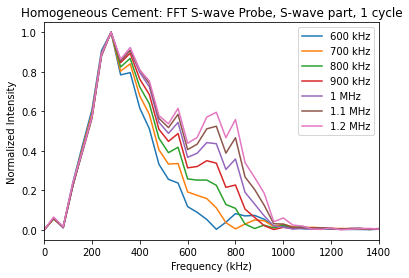

In [35]:
plt.plot(f_HC_S1_600,np.abs(FT_HC_S1_600)/max(np.abs(FT_HC_S1_600)), label="600 kHz")
plt.plot(f_HC_S1_700,np.abs(FT_HC_S1_700)/max(np.abs(FT_HC_S1_700)), label="700 kHz")
plt.plot(f_HC_S1_800,np.abs(FT_HC_S1_800)/max(np.abs(FT_HC_S1_800)), label="800 kHz")
plt.plot(f_HC_S1_900,np.abs(FT_HC_S1_900)/max(np.abs(FT_HC_S1_900)), label="900 kHz")
plt.plot(f_HC_S1_1000,np.abs(FT_HC_S1_1000)/max(np.abs(FT_HC_S1_1000)), label="1 MHz")
plt.plot(f_HC_S1_1100,np.abs(FT_HC_S1_1100)/max(np.abs(FT_HC_S1_1100)), label="1.1 MHz")
plt.plot(f_HC_S1_1200,np.abs(FT_HC_S1_1200)/max(np.abs(FT_HC_S1_1200)), label="1.2 MHz")

plt.title('Homogeneous Cement: FFT S-wave Probe, S-wave part, 1 cycle')
#
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")
plt.ylabel("Normalized Intensity")
plt.savefig('Figures/HomoCem_1cyc_Strans_Spart_AmpFFT.jpeg', dpi=300)


In [19]:
# Frequency at peak (Hz):
print(f_HC_S1_1200[np.argmax(np.abs(FT_HC_S1_1200))])

-280.1120448180722


In [20]:
# df
print(f_HC_S1_600[2]-f_HC_S1_600[1])
print(f_HC_S1_700[2]-f_HC_S1_700[1])
print(f_HC_S1_800[2]-f_HC_S1_800[1])
print(f_HC_S1_900[2]-f_HC_S1_900[1])
print(f_HC_S1_1000[2]-f_HC_S1_1000[1])
print(f_HC_S1_1100[2]-f_HC_S1_1100[1])
print(f_HC_S1_1200[2]-f_HC_S1_1200[1])


40.01600640257675
40.01600640257675
40.01600640257675
40.01600640257675
40.01600640257675
40.01600640257675
40.01600640257675


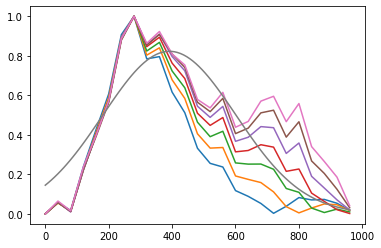

In [36]:
plt.plot(f_HC_S1_600[1249:1274],np.abs(FT_HC_S1_600[1249:1274])/max(np.abs(FT_HC_S1_600[1249:1274])), label="600 kHz")
plt.plot(f_HC_S1_700[1249:1274],np.abs(FT_HC_S1_700[1249:1274])/max(np.abs(FT_HC_S1_700[1249:1274])), label="700 kHz")
plt.plot(f_HC_S1_800[1249:1274],np.abs(FT_HC_S1_800[1249:1274])/max(np.abs(FT_HC_S1_800[1249:1274])), label="800 kHz")
plt.plot(f_HC_S1_900[1249:1274],np.abs(FT_HC_S1_900[1249:1274])/max(np.abs(FT_HC_S1_900[1249:1274])), label="900 kHz")
plt.plot(f_HC_S1_1000[1249:1274],np.abs(FT_HC_S1_1000[1249:1274])/max(np.abs(FT_HC_S1_1000[1249:1274])), label="1 MHz")
plt.plot(f_HC_S1_1100[1249:1274],np.abs(FT_HC_S1_1100[1249:1274])/max(np.abs(FT_HC_S1_1100[1249:1274])), label="1.1 MHz")
plt.plot(f_HC_S1_1200[1249:1274],np.abs(FT_HC_S1_1200[1249:1274])/max(np.abs(FT_HC_S1_1200[1249:1274])), label="1.2 MHz")
plt.plot(x5,gaus5)

In [37]:
print('600kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_HC_S1_600[1249:1274],np.abs(FT_HC_S1_600[1249:1274])/max(np.abs(FT_HC_S1_600[1249:1274])))
print('700kHz')
x2,gaus2,index2, central2, fwhm2 = FWHM(f_HC_S1_700[1249:1274],np.abs(FT_HC_S1_700[1249:1274])/max(np.abs(FT_HC_S1_700[1249:1274])))
print('800kHz')
x3,gaus3,index3, central3, fwhm3 = FWHM(f_HC_S1_800[1249:1274],np.abs(FT_HC_S1_800[1249:1274])/max(np.abs(FT_HC_S1_800[1249:1274])))
print('900kHz')
x4,gaus4,index4, central4, fwhm4 = FWHM(f_HC_S1_900[1249:1274],np.abs(FT_HC_S1_900[1249:1274])/max(np.abs(FT_HC_S1_900[1249:1274])))
print('1000kHz')
x5,gaus5,index5, central5, fwhm5 = FWHM(f_HC_S1_1000[1249:1270],np.abs(FT_HC_S1_1000[1249:1270])/max(np.abs(FT_HC_S1_1000[1249:1270])))
print('1100kHz')
x6,gaus6,index6, central6, fwhm6 = FWHM(f_HC_S1_1100[1249:1270],np.abs(FT_HC_S1_1100[1249:1270])/max(np.abs(FT_HC_S1_1100[1249:1270])))
print('1200kHz')
x7,gaus7,index7, central7, fwhm7 = FWHM(f_HC_S1_1200[1249:1270],np.abs(FT_HC_S1_1200[1249:1270])/max(np.abs(FT_HC_S1_1200[1249:1270])))

600kHz
Peak Index: 32
Central Frequency: 310.42720118366447
FWHM: 291.0255011096855

700kHz
Peak Index: 33
Central Frequency: 320.12805122065396
FWHM: 320.128051220654

800kHz
Peak Index: 35
Central Frequency: 339.529751294633
FWHM: 358.931451368612

900kHz
Peak Index: 38
Central Frequency: 368.63230140560154
FWHM: 417.1365515905492

1000kHz
Peak Index: 48
Central Frequency: 388.0340014795806
FWHM: 476.95846015198447

1100kHz
Peak Index: 51
Central Frequency: 412.28612657205434
FWHM: 533.5467520344233

1200kHz
Peak Index: 53
Central Frequency: 428.4542099670369
FWHM: 590.1350439168622



Text(0.5, 0, 'Frequency (kHz)')

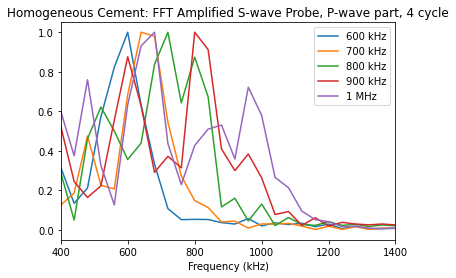

In [11]:
plt.plot(f_HC_P4_600,np.abs(FT_HC_P4_600)/max(np.abs(FT_HC_P4_600)), label="600 kHz")
plt.plot(f_HC_P4_700,np.abs(FT_HC_P4_700)/max(np.abs(FT_HC_P4_700)), label="700 kHz")
plt.plot(f_HC_P4_800,np.abs(FT_HC_P4_800)/max(np.abs(FT_HC_P4_800)), label="800 kHz")
plt.plot(f_HC_P4_900,np.abs(FT_HC_P4_900)/max(np.abs(FT_HC_P4_900)), label="900 kHz")
plt.plot(f_HC_P4_1000,np.abs(FT_HC_P4_1000)/max(np.abs(FT_HC_P4_1000)), label="1 MHz")
#plt.plot(f_HC_P4_1100,np.abs(FT_HC_P4_1100)/max(np.abs(FT_HC_P4_1100)), label="1.1 MHz")
#plt.plot(f_HC_P4_1200,np.abs(FT_HC_P4_1200)/max(np.abs(FT_HC_P4_1200)), label="1.2 MHz")

plt.title('Homogeneous Cement: FFT Amplified S-wave Probe, P-wave part, 4 cycle')
plt.legend()
plt.xlim([400,1400])
plt.xlabel("Frequency (kHz)")

Text(0.5, 0, 'Frequency (kHz)')

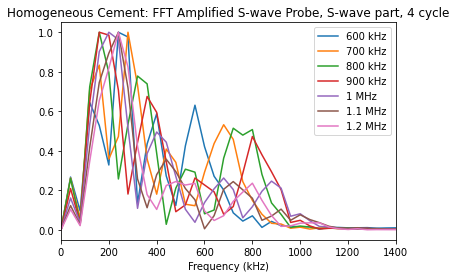

In [24]:
plt.plot(f_HC_S4_600,np.abs(FT_HC_S4_600)/max(np.abs(FT_HC_S4_600)), label="600 kHz")
plt.plot(f_HC_S4_700,np.abs(FT_HC_S4_700)/max(np.abs(FT_HC_S4_700)), label="700 kHz")
plt.plot(f_HC_S4_800,np.abs(FT_HC_S4_800)/max(np.abs(FT_HC_S4_800)), label="800 kHz")
plt.plot(f_HC_S4_900,np.abs(FT_HC_S4_900)/max(np.abs(FT_HC_S4_900)), label="900 kHz")
plt.plot(f_HC_S4_1000,np.abs(FT_HC_S4_1000)/max(np.abs(FT_HC_S4_1000)), label="1 MHz")
plt.plot(f_HC_S4_1100,np.abs(FT_HC_S4_1100)/max(np.abs(FT_HC_S4_1100)), label="1.1 MHz")
plt.plot(f_HC_S4_1200,np.abs(FT_HC_S4_1200)/max(np.abs(FT_HC_S4_1200)), label="1.2 MHz")

plt.title('Homogeneous Cement: FFT Amplified S-wave Probe, S-wave part, 4 cycle')
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")

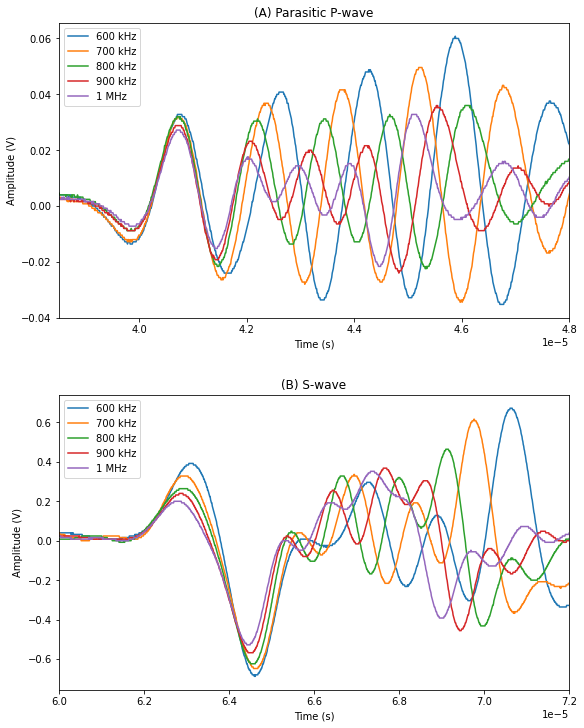

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# plot time signal:
axs[1].set_title("(B) S-wave")
axs[1].plot(t_HC_S4_600,vol_HC_S4_600, label="600 kHz")
axs[1].plot(t_HC_S4_700,vol_HC_S4_700, label="700 kHz")
axs[1].plot(t_HC_S4_800,vol_HC_S4_800, label="800 kHz")
axs[1].plot(t_HC_S4_900,vol_HC_S4_900, label="900 kHz")
axs[1].plot(t_HC_S4_1000,vol_HC_S4_1000, label="1 MHz")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude (V)")
axs[1].legend(loc=2)
axs[1].set_xlim([6e-5,7.2e-5])

#axs[0].text(1e-6, 90, 'Begin text', horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)


axs[0].plot(t_HC_P4_600 -0.1e-6,vol_HC_P4_600, label="600 kHz")
axs[0].plot(t_HC_P4_700 -0.05e-6,vol_HC_P4_700, label="700 kHz")
axs[0].plot(t_HC_P4_800,vol_HC_P4_800, label="800 kHz")
axs[0].plot(t_HC_P4_900 +0.05e-6,vol_HC_P4_900, label="900 kHz")
axs[0].plot(t_HC_P4_1000 +0.1e-6,vol_HC_P4_1000, label="1 MHz")
axs[0].set_title("(A) Parasitic P-wave")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude (V)")
axs[0].set_xlim([3.85e-5,4.8e-5])
axs[0].legend(loc=2)
fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=3)
#fig.tight_layout()
plt.savefig('Figures/HoCem_4cyc_Stran.jpg', dpi=400)

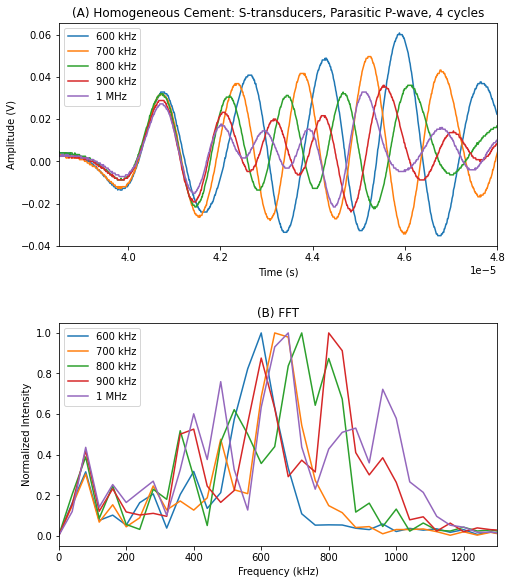

In [17]:
#Homogeneous Cement: S-transducers, Parasitic P-wave, 4 cycles
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))

axs[0].plot(t_HC_P4_600 -0.1e-6,vol_HC_P4_600, label="600 kHz")
axs[0].plot(t_HC_P4_700 -0.05e-6,vol_HC_P4_700, label="700 kHz")
axs[0].plot(t_HC_P4_800,vol_HC_P4_800, label="800 kHz")
axs[0].plot(t_HC_P4_900 +0.05e-6,vol_HC_P4_900, label="900 kHz")
axs[0].plot(t_HC_P4_1000 +0.1e-6,vol_HC_P4_1000, label="1 MHz")
axs[0].set_title("(A) Homogeneous Cement: S-transducers, Parasitic P-wave, 4 cycles")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude (V)")
axs[0].set_xlim([3.85e-5,4.8e-5])
axs[0].legend(loc=2)

axs[1].plot(f_HC_P4_600,np.abs(FT_HC_P4_600)/max(np.abs(FT_HC_P4_600)), label="600 kHz")
axs[1].plot(f_HC_P4_700,np.abs(FT_HC_P4_700)/max(np.abs(FT_HC_P4_700)), label="700 kHz")
axs[1].plot(f_HC_P4_800,np.abs(FT_HC_P4_800)/max(np.abs(FT_HC_P4_800)), label="800 kHz")
axs[1].plot(f_HC_P4_900,np.abs(FT_HC_P4_900)/max(np.abs(FT_HC_P4_900)), label="900 kHz")
axs[1].plot(f_HC_P4_1000,np.abs(FT_HC_P4_1000)/max(np.abs(FT_HC_P4_1000)), label="1 MHz")
#axs[1].plot(f_HC_P4_1100,np.abs(FT_HC_P4_1100)/max(np.abs(FT_HC_P4_1100)), label="1.1 MHz")
#axs[1].plot(f_HC_P4_1200,np.abs(FT_HC_P4_1200)/max(np.abs(FT_HC_P4_1200)), label="1.2 MHz")
axs[1].set_title('')
axs[1].set_title("(B) FFT")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Normalized Intensity")
axs[1].legend(loc=2)
axs[1].set_xlim([0,1300])


fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=3)
#fig.tight_layout()
plt.savefig('Figures/HoCem_4cyc_Stran_Ppart.jpg', dpi=400)

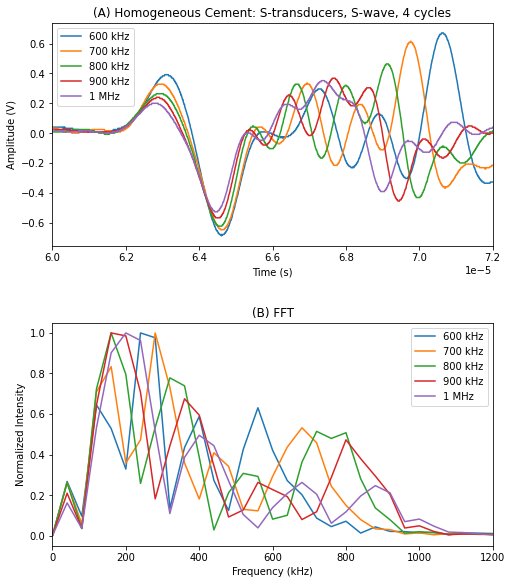

In [19]:

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))

axs[0].plot(t_HC_S4_600,vol_HC_S4_600, label="600 kHz")
axs[0].plot(t_HC_S4_700,vol_HC_S4_700, label="700 kHz")
axs[0].plot(t_HC_S4_800,vol_HC_S4_800, label="800 kHz")
axs[0].plot(t_HC_S4_900,vol_HC_S4_900, label="900 kHz")
axs[0].plot(t_HC_S4_1000,vol_HC_S4_1000, label="1 MHz")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude (V)")
axs[0].legend(loc=2)
axs[0].set_xlim([6e-5,7.2e-5])
axs[0].set_title("(A) Homogeneous Cement: S-transducers, S-wave, 4 cycles")


axs[1].plot(f_HC_S4_600,np.abs(FT_HC_S4_600)/max(np.abs(FT_HC_S4_600)), label="600 kHz")
axs[1].plot(f_HC_S4_700,np.abs(FT_HC_S4_700)/max(np.abs(FT_HC_S4_700)), label="700 kHz")
axs[1].plot(f_HC_S4_800,np.abs(FT_HC_S4_800)/max(np.abs(FT_HC_S4_800)), label="800 kHz")
axs[1].plot(f_HC_S4_900,np.abs(FT_HC_S4_900)/max(np.abs(FT_HC_S4_900)), label="900 kHz")
axs[1].plot(f_HC_S4_1000,np.abs(FT_HC_S4_1000)/max(np.abs(FT_HC_S4_1000)), label="1 MHz")
#axs[1].plot(f_HC_S4_1100,np.abs(FT_HC_S4_1100)/max(np.abs(FT_HC_S4_1100)), label="1.1 MHz")
#axs[1].plot(f_HC_S4_1200,np.abs(FT_HC_S4_1200)/max(np.abs(FT_HC_S4_1200)), label="1.2 MHz")

axs[1].set_title("(B) FFT")
axs[1].set_xlabel("Frequency (kHz)")
axs[1].set_ylabel("Normalized Intensity")
axs[1].legend(loc=1)
axs[1].set_xlim([0,1200])
fig.tight_layout(pad=0.3, w_pad=0.2,h_pad=3)
#fig.tight_layout()
plt.savefig('Figures/HoCem_4cyc_Stran_Spart.jpg', dpi=400)

## Sandstone (NS6)

In [38]:
# P-part, 1 cycle
t_S_P1_600,vol_S_P1_600 = read_my_csv('TEK0069.csv')
f_S_P1_600,FT_S_P1_600=myfft(t_S_P1_600,vol_S_P1_600)
t_S_P1_700,vol_S_P1_700 = read_my_csv('TEK0070.csv')
f_S_P1_700,FT_S_P1_700=myfft(t_S_P1_700,vol_S_P1_700)
t_S_P1_800,vol_S_P1_800 = read_my_csv('TEK0071.csv')
f_S_P1_800,FT_S_P1_800=myfft(t_S_P1_800,vol_S_P1_800)
t_S_P1_900,vol_S_P1_900 = read_my_csv('TEK0072.csv')
f_S_P1_900,FT_S_P1_900=myfft(t_S_P1_900,vol_S_P1_900)
t_S_P1_1000,vol_S_P1_1000 = read_my_csv('TEK0073.csv')
f_S_P1_1000,FT_S_P1_1000=myfft(t_S_P1_1000,vol_S_P1_1000)

# P-part, 4 cycle
t_S_P4_600,vol_S_P4_600 = read_my_csv('TEK0064.csv')
f_S_P4_600,FT_S_P4_600=myfft(t_S_P4_600,vol_S_P4_600)
t_S_P4_700,vol_S_P4_700 = read_my_csv('TEK0065.csv')
f_S_P4_700,FT_S_P4_700=myfft(t_S_P4_700,vol_S_P4_700)
t_S_P4_800,vol_S_P4_800 = read_my_csv('TEK0066.csv')
f_S_P4_800,FT_S_P4_800=myfft(t_S_P4_800,vol_S_P4_800)
t_S_P4_900,vol_S_P4_900 = read_my_csv('TEK0067.csv')
f_S_P4_900,FT_S_P4_900=myfft(t_S_P4_900,vol_S_P4_900)
t_S_P4_1000,vol_S_P4_1000 = read_my_csv('TEK0068.csv')
f_S_P4_1000,FT_S_P4_1000=myfft(t_S_P4_1000,vol_S_P4_1000)


In [39]:
# S-part, 1 cycle
t_S_S1_600,vol_S_S1_600 = read_my_csv('TEK0074.csv')
f_S_S1_600,FT_S_S1_600=myfft(t_S_S1_600,vol_S_S1_600)
t_S_S1_700,vol_S_S1_700 = read_my_csv('TEK0075.csv')
f_S_S1_700,FT_S_S1_700=myfft(t_S_S1_700,vol_S_S1_700)
t_S_S1_800,vol_S_S1_800 = read_my_csv('TEK0076.csv')
f_S_S1_800,FT_S_S1_800=myfft(t_S_S1_800,vol_S_S1_800)
t_S_S1_900,vol_S_S1_900 = read_my_csv('TEK0077.csv')
f_S_S1_900,FT_S_S1_900=myfft(t_S_S1_900,vol_S_S1_900)
t_S_S1_1000,vol_S_S1_1000 = read_my_csv('TEK0078.csv')
f_S_S1_1000,FT_S_S1_1000=myfft(t_S_S1_1000,vol_S_S1_1000)

# S-part, 4 cycle
t_S_S4_600,vol_S_S4_600 = read_my_csv('TEK0079.csv')
f_S_S4_600,FT_S_S4_600=myfft(t_S_S4_600,vol_S_S4_600)
t_S_S4_700,vol_S_S4_700 = read_my_csv('TEK0080.csv')
f_S_S4_700,FT_S_S4_700=myfft(t_S_S4_700,vol_S_S4_700)
t_S_S4_800,vol_S_S4_800 = read_my_csv('TEK0081.csv')
f_S_S4_800,FT_S_S4_800=myfft(t_S_S4_800,vol_S_S4_800)
t_S_S4_900,vol_S_S4_900 = read_my_csv('TEK0082.csv')
f_S_S4_900,FT_S_S4_900=myfft(t_S_S4_900,vol_S_S4_900)
t_S_S4_1000,vol_S_S4_1000 = read_my_csv('TEK0083.csv')
f_S_S4_1000,FT_S_S4_1000=myfft(t_S_S4_1000,vol_S_S4_1000)

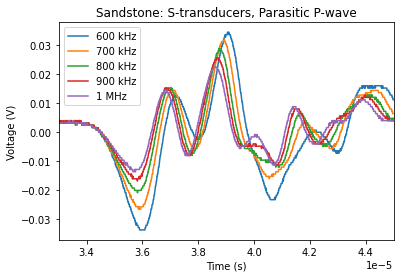

In [6]:
plt.plot(t_S_P1_600,vol_S_P1_600, label="600 kHz")
plt.plot(t_S_P1_700,vol_S_P1_700, label="700 kHz")
plt.plot(t_S_P1_800,vol_S_P1_800, label="800 kHz")
plt.plot(t_S_P1_900,vol_S_P1_900, label="900 kHz")
plt.plot(t_S_P1_1000,vol_S_P1_1000, label="1 MHz")

plt.title('Sandstone: S-transducers, Parasitic P-wave')
plt.legend()
plt.xlim([3.3e-5,4.5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('Figures/Sandstone_Strans_Ppart.jpeg', dpi=300)

Text(0, 0.5, 'Voltage (V)')

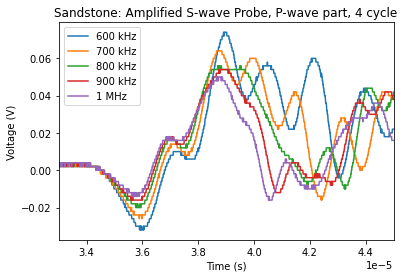

In [7]:
plt.plot(t_S_P4_600,vol_S_P4_600, label="600 kHz")
plt.plot(t_S_P4_700,vol_S_P4_700, label="700 kHz")
plt.plot(t_S_P4_800,vol_S_P4_800, label="800 kHz")
plt.plot(t_S_P4_900,vol_S_P4_900, label="900 kHz")
plt.plot(t_S_P4_1000,vol_S_P4_1000, label="1 MHz")

plt.title('Sandstone: Amplified S-wave Probe, P-wave part, 4 cycle')
plt.legend()
plt.xlim([3.3e-5,4.5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

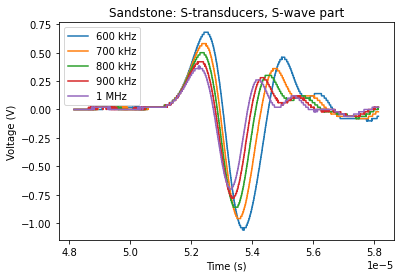

In [8]:
plt.plot(t_S_S1_600,vol_S_S1_600, label="600 kHz")
plt.plot(t_S_S1_700,vol_S_S1_700, label="700 kHz")
plt.plot(t_S_S1_800,vol_S_S1_800, label="800 kHz")
plt.plot(t_S_S1_900,vol_S_S1_900, label="900 kHz")
plt.plot(t_S_S1_1000,vol_S_S1_1000, label="1 MHz")

plt.title('Sandstone: S-transducers, S-wave part')
plt.legend()
#plt.xlim([3.3e-5,4.5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('Figures/Sandstone_Strans_Spart.jpeg', dpi=300)

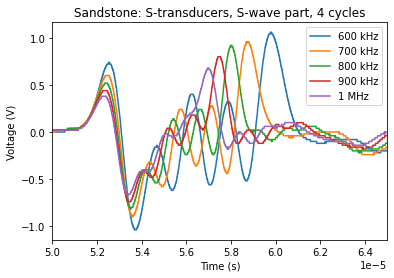

In [27]:
plt.plot(t_S_S4_600,vol_S_S4_600, label="600 kHz")
plt.plot(t_S_S4_700,vol_S_S4_700, label="700 kHz")
plt.plot(t_S_S4_800,vol_S_S4_800, label="800 kHz")
plt.plot(t_S_S4_900,vol_S_S4_900, label="900 kHz")
plt.plot(t_S_S4_1000,vol_S_S4_1000, label="1 MHz")

plt.title('Sandstone: S-transducers, S-wave part, 4 cycles')
plt.legend()
plt.xlim([5e-5,6.5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.savefig('Figures/Sandstone_Strans_Spart_4cyc.jpeg', dpi=300)

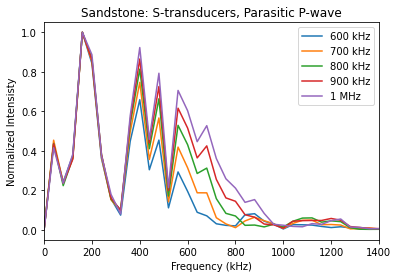

In [10]:
plt.plot(f_S_P1_600,np.abs(FT_S_P1_600)/max(np.abs(FT_S_P1_600)), label="600 kHz")
plt.plot(f_S_P1_700,np.abs(FT_S_P1_700)/max(np.abs(FT_S_P1_700)), label="700 kHz")
plt.plot(f_S_P1_800,np.abs(FT_S_P1_800)/max(np.abs(FT_S_P1_800)), label="800 kHz")
plt.plot(f_S_P1_900,np.abs(FT_S_P1_900)/max(np.abs(FT_S_P1_900)), label="900 kHz")
plt.plot(f_S_P1_1000,np.abs(FT_S_P1_1000)/max(np.abs(FT_S_P1_1000)), label="1 MHz")

plt.title('Sandstone: S-transducers, Parasitic P-wave')
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")
plt.ylabel("Normalized Intensisty")
plt.savefig('Figures/Sandstone_Strans_PpartFFT.jpeg', dpi=300)

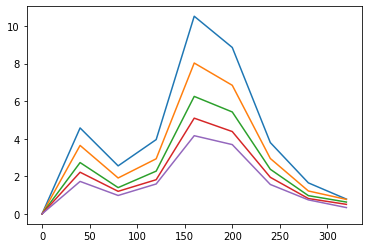

In [43]:
plt.plot(f_S_P1_600[1249:1258],np.abs(FT_S_P1_600[1249:1258]), label="600 kHz")
plt.plot(f_S_P1_700[1249:1258],np.abs(FT_S_P1_700[1249:1258]), label="700 kHz")
plt.plot(f_S_P1_800[1249:1258],np.abs(FT_S_P1_800[1249:1258]), label="800 kHz")
plt.plot(f_S_P1_900[1249:1258],np.abs(FT_S_P1_900[1249:1258]), label="900 kHz")
plt.plot(f_S_P1_1000[1249:1258],np.abs(FT_S_P1_1000[1249:1258]), label="1 MHz")

In [44]:
print('600kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_P1_600[1249:1258],np.abs(FT_S_P1_600[1249:1258]))
print('700kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_P1_700[1249:1258],np.abs(FT_S_P1_700[1249:1258]))
print('800kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_P1_800[1249:1258],np.abs(FT_S_P1_800[1249:1258]))
print('900kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_P1_900[1249:1258],np.abs(FT_S_P1_900[1249:1258]))
print('1000kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_P1_1000[1249:1258],np.abs(FT_S_P1_1000[1249:1258]))

600kHz
Peak Index: 54
Central Frequency: 174.6153006657521
FWHM: 129.34466715981637

700kHz
Peak Index: 54
Central Frequency: 174.6153006657521
FWHM: 129.34466715981637

800kHz
Peak Index: 54
Central Frequency: 174.6153006657521
FWHM: 126.11105048082096

900kHz
Peak Index: 54
Central Frequency: 174.6153006657521
FWHM: 126.11105048082096

1000kHz
Peak Index: 54
Central Frequency: 174.6153006657521
FWHM: 126.11105048082096



In [11]:
print(f_S_P1_600[np.argmax(np.abs(FT_S_P1_600))])

-160.06402561027275


In [24]:
print(f_S_P1_600[2]-f_S_P1_600[1])
print(f_S_P1_700[2]-f_S_P1_700[1])
print(f_S_P1_800[2]-f_S_P1_800[1])
print(f_S_P1_900[2]-f_S_P1_900[1])
print(f_S_P1_1000[2]-f_S_P1_1000[1])

40.016006402569474
40.016006402569474
40.016006402569474
40.016006402569474
40.016006402569474


Text(0.5, 0, 'Frequency (kHz)')

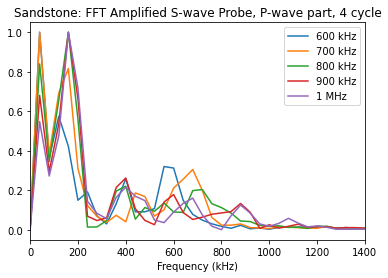

In [62]:
plt.plot(f_S_P4_600,np.abs(FT_S_P4_600)/max(np.abs(FT_S_P4_600)), label="600 kHz")
plt.plot(f_S_P4_700,np.abs(FT_S_P4_700)/max(np.abs(FT_S_P4_700)), label="700 kHz")
plt.plot(f_S_P4_800,np.abs(FT_S_P4_800)/max(np.abs(FT_S_P4_800)), label="800 kHz")
plt.plot(f_S_P4_900,np.abs(FT_S_P4_900)/max(np.abs(FT_S_P4_900)), label="900 kHz")
plt.plot(f_S_P4_1000,np.abs(FT_S_P4_1000)/max(np.abs(FT_S_P4_1000)), label="1 MHz")

plt.title('Sandstone: FFT Amplified S-wave Probe, P-wave part, 4 cycle')
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")

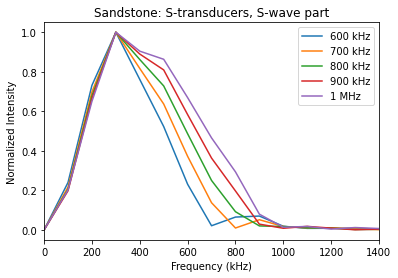

In [29]:
plt.plot(f_S_S1_600,np.abs(FT_S_S1_600)/max(np.abs(FT_S_S1_600)), label="600 kHz")
plt.plot(f_S_S1_700,np.abs(FT_S_S1_700)/max(np.abs(FT_S_S1_700)), label="700 kHz")
plt.plot(f_S_S1_800,np.abs(FT_S_S1_800)/max(np.abs(FT_S_S1_800)), label="800 kHz")
plt.plot(f_S_S1_900,np.abs(FT_S_S1_900)/max(np.abs(FT_S_S1_900)), label="900 kHz")
plt.plot(f_S_S1_1000,np.abs(FT_S_S1_1000)/max(np.abs(FT_S_S1_1000)), label="1 MHz")

plt.title('Sandstone: S-transducers, S-wave part')
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")
plt.ylabel("Normalized Intensity")
plt.savefig('Figures/Sandstone_Strans_Spart_FFT.jpeg', dpi=300)

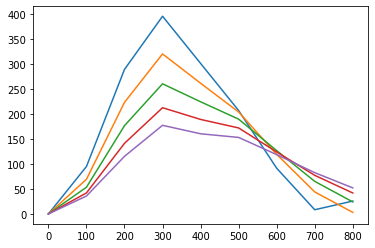

In [45]:
plt.plot(f_S_S1_600[1249:1258],np.abs(FT_S_S1_600[1249:1258]), label="600 kHz")
plt.plot(f_S_S1_700[1249:1258],np.abs(FT_S_S1_700[1249:1258]), label="700 kHz")
plt.plot(f_S_S1_800[1249:1258],np.abs(FT_S_S1_800[1249:1258]), label="800 kHz")
plt.plot(f_S_S1_900[1249:1258],np.abs(FT_S_S1_900[1249:1258]), label="900 kHz")
plt.plot(f_S_S1_1000[1249:1258],np.abs(FT_S_S1_1000[1249:1258]), label="1 MHz")

In [48]:
print('600kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_S1_600[1249:1258],np.abs(FT_S_S1_600[1249:1258])/max(np.abs(FT_S_S1_600)))
print('700kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_S1_700[1249:1258],np.abs(FT_S_S1_700[1249:1258])/max(np.abs(FT_S_S1_700)))
print('800kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_S1_800[1249:1258],np.abs(FT_S_S1_800[1249:1258])/max(np.abs(FT_S_S1_800)))
print('900kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_S1_900[1249:1258],np.abs(FT_S_S1_900[1249:1258])/max(np.abs(FT_S_S1_900)))
print('1000kHz')
x1,gaus1,index1, central1, fwhm1 = FWHM(f_S_S1_1000[1249:1258],np.abs(FT_S_S1_1000[1249:1258])/max(np.abs(FT_S_S1_1000)))

600kHz
Peak Index: 40
Central Frequency: 323.3616678993218
FWHM: 347.61379299177094

700kHz
Peak Index: 43
Central Frequency: 347.61379299177094
FWHM: 379.94995978170306

800kHz
Peak Index: 46
Central Frequency: 371.8659180842201
FWHM: 428.45420996660135

900kHz
Peak Index: 49
Central Frequency: 396.1180431766692
FWHM: 460.7903767565336

1000kHz
Peak Index: 52
Central Frequency: 420.3701682691183
FWHM: 501.21058524394874



In [14]:
print(f_S_S1_700[np.argmax(np.abs(FT_S_S1_600))])

300.120048019058


In [26]:
print(f_S_S1_600[2]-f_S_S1_600[1])
print(f_S_S1_700[2]-f_S_S1_700[1])
print(f_S_S1_800[2]-f_S_S1_800[1])

print(f_S_S1_900[2]-f_S_S1_900[1])
print(f_S_S1_1000[2]-f_S_S1_1000[1])

100.04001600634365
100.04001600634365
100.04001600634365
100.04001600634365
100.04001600634365


Text(0.5, 0, 'Frequency (kHz)')

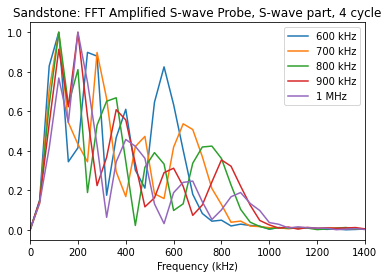

In [64]:
plt.plot(f_S_S4_600,np.abs(FT_S_S4_600)/max(np.abs(FT_S_S4_600)), label="600 kHz")
plt.plot(f_S_S4_700,np.abs(FT_S_S4_700)/max(np.abs(FT_S_S4_700)), label="700 kHz")
plt.plot(f_S_S4_800,np.abs(FT_S_S4_800)/max(np.abs(FT_S_S4_800)), label="800 kHz")
plt.plot(f_S_S4_900,np.abs(FT_S_S4_900)/max(np.abs(FT_S_S4_900)), label="900 kHz")
plt.plot(f_S_S4_1000,np.abs(FT_S_S4_1000)/max(np.abs(FT_S_S4_1000)), label="1 MHz")

plt.title('Sandstone: FFT Amplified S-wave Probe, S-wave part, 4 cycle')
plt.legend()
plt.xlim([0,1400])
plt.xlabel("Frequency (kHz)")

Text(0, 0.5, 'Voltage (V)')

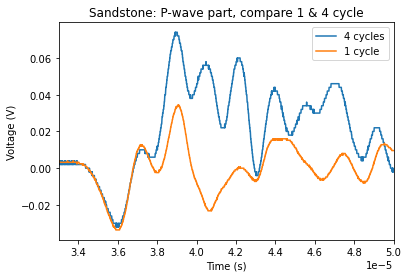

In [39]:
plt.plot(t_S_P4_600,vol_S_P4_600, label="4 cycles")
plt.plot(t_S_P1_600,vol_S_P1_600, label="1 cycle")

plt.title('Sandstone: P-wave part, compare 1 & 4 cycle')
plt.legend()
plt.xlim([3.3e-5,5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

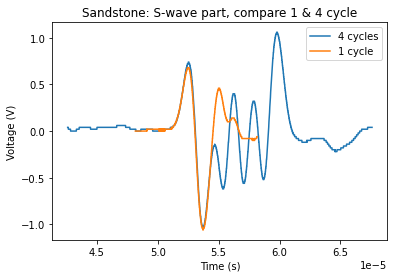

In [65]:
plt.plot(t_S_S4_600,vol_S_S4_600, label="4 cycles")
plt.plot(t_S_S1_600,vol_S_S1_600, label="1 cycle")

plt.title('Sandstone: S-wave part, compare 1 & 4 cycle')
plt.legend()
#plt.xlim([3.3e-5,5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

## Compare Sandstone and Cement

Text(0, 0.5, 'Voltage (V)')

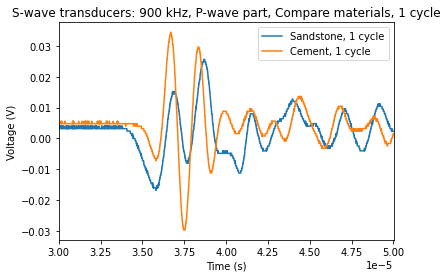

In [86]:
plt.plot(t_S_P1_900,vol_S_P1_900, label="Sandstone, 1 cycle")
plt.plot(t_HC_P1_900 -0.4e-5, vol_HC_P1_900,label="Cement, 1 cycle")

plt.title('S-wave transducers: 900 kHz, P-wave part, Compare materials, 1 cycle')
plt.legend()
plt.xlim([3e-5,5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

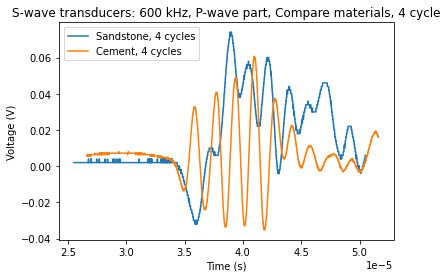

In [73]:
plt.plot(t_S_P4_600,vol_S_P4_600, label="Sandstone, 4 cycles")
plt.plot(t_HC_P4_600 -0.5e-5,vol_HC_P4_600, label="Cement, 4 cycles")


plt.title('S-wave transducers: 600 kHz, P-wave part, Compare materials, 4 cycle')
plt.legend()
#plt.xlim([3e-5,5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

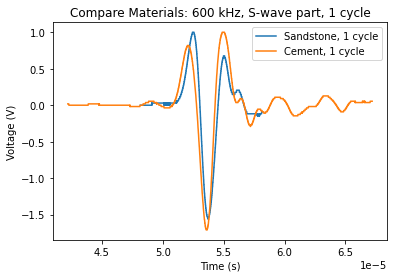

In [82]:

#plt.plot(t_S_S4_600,vol_S_S4_600, label="Sandstone, 4 cycles")
plt.plot(t_S_S1_600,vol_S_S1_600/max(vol_S_S1_600), label="Sandstone, 1 cycle")
#plt.plot(t_HC_S4_600,vol_HC_S4_600, label="Cement, 4 cycles")
plt.plot(t_HC_S1_600 -1.1e-5,vol_HC_S1_600/max(vol_HC_S1_600), label="Cement, 1 cycle")

plt.title('Compare Materials: 600 kHz, S-wave part, 1 cycle')
plt.legend()
#plt.xlim([3e-5,5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")

Text(0, 0.5, 'Voltage (V)')

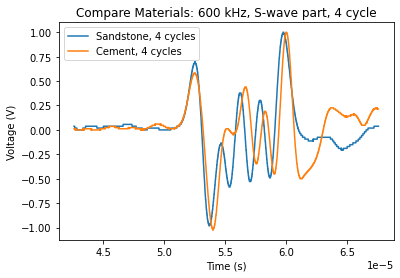

In [81]:
plt.plot(t_S_S4_600,vol_S_S4_600/max(vol_S_S4_600), label="Sandstone, 4 cycles")
#plt.plot(t_S_S1_600,vol_S_S1_600/max(vol_S_S1_600), label="Sandstone, 1 cycle")
plt.plot(t_HC_S4_600 -1.06e-5,vol_HC_S4_600/max(vol_HC_S4_600), label="Cement, 4 cycles")
#plt.plot(t_HC_S1_600 -1.1e-5,vol_HC_S1_600/max(vol_HC_S1_600), label="Cement, 1 cycle")

plt.title('Compare Materials: 600 kHz, S-wave part, 4 cycle')
plt.legend()
#plt.xlim([3e-5,5e-5])
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")